# Exploring the Opioid Epidemic
### Emma Price

In this file, I explore the effect of opioid use on different demographic data from the 2017 National Survey of Drug Use and Health (NSDUH) that I loaded, cleaned, and selected certain columns from in the [data_cleaning.ipynd](http://localhost:8888/notebooks/data_cleaning.ipynb) file. The aims of this notebook are to explore the data from NSDUH related to opioids (identified here as heroin, pain relievers, and oxycontin). Pain relievers in NSDUH are listed and were all cross-referenced to ensure that they are in fact opiates.

In [1]:
import pandas as pd
import numpy as np
import thinkstats2
from thinkstats2 import Hist, Pmf, Cdf, Jitter, RenderNormalCdf, RenderParetoCdf
import thinkplot
import survival

In [2]:
# This function is from the ThinkStats2e, all credit to 
# Allen Downey.

def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d


In [3]:
# Load the modified NSDUH data
nsduh = pd.read_stata('nsduh.dta')

#### Just a reminder of what the data looks like and what each column is made of

In [4]:
nsduh.head()

,index,NEWRACE2,pnrnmflag,irsex,sexatract,AGE2,IREDUHIGHST2,irpnrnmage,herage,oxcnnmage,...,crkflag,inhalflag,lsdflag,pcpflag,ecstmoflag,ketminflag,sedanyflag,stmanyflag,trqanyflag,psyanyflag
0,0,White,0,1,1.0,65+,15.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0 - Never used
1,1,Afr Am,0,1,1.0,35-49,15.0,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,1 - Ever used
2,2,Asian,0,1,1.0,35-49,13.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1 - Ever used
3,3,Hisp,0,1,1.0,35-49,15.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1 - Ever used
4,4,White,0,2,1.0,65+,12.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0 - Never used


## Age of First (Mis)Use Comparison
One thing that I was interested in is the different in ages of when people started using (in the case of pain relievers and oxycontin, misusing) these opioids. I know that a lot of people have access to perscription opioids fairly early in life due surgeries and the like.

In [5]:
nsduh['herage'].describe()

count    1015.000000
mean       22.776355
std         7.392906
min        10.000000
25%        18.000000
50%        21.000000
75%        25.000000
max        57.000000
Name: herage, dtype: float64

In [6]:
nsduh['irpnrnmage'].describe()

count    569.000000
mean      25.246046
std       13.732451
min       11.000000
25%       16.000000
50%       20.000000
75%       30.000000
max       87.000000
Name: irpnrnmage, dtype: float64

In [7]:
nsduh['oxcnnmage'].describe()

count    407.000000
mean      22.439803
std       10.256594
min        8.000000
25%       16.000000
50%       18.000000
75%       26.000000
max       65.000000
Name: oxcnnmage, dtype: float64

This CDF illustrates how those who use heroin begin to do so a bit later in life than those who misuse pain relievers and oxycontin. I seemed to show interestingly that the curve of heroin first use is shifted to an older age compared to pain relievers, but then is steeper than pain relievers. To investigate this difference, I also created a hazard analysis to investigate this through the lens of the risk of using heroin and pain relievers for the first time. This analysis shows that the risk of heroin first use is initially lower than the risk of pain reliever first use, but around the age of 18 heroin becomes more "risky". Pain relievers being more "risky" at an earlier age is probably due to the early access that people have to pain relievers for surgeries. Pain relievers and heroin seem to be equally risky again in the early 30s, and then around 40 the data can no longer be fully trusted because there so few people who use for the first time, they have a lot of power in the data. It does seem like there is a clear "danger zone" of heroin first use between 18 and 40. This could be due to the public perception of heroin -- that if you have made it to 30, it seems unlikely that you would suddenly decide to do heroin for the first time. Pain relievers seem to be more consistently risky, throughout life and starting at a later age.

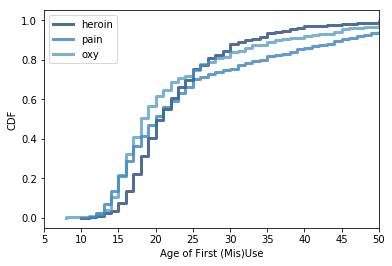

In [8]:
her_age_cdf = Cdf(nsduh['herage'], label='heroin')
pnr_age_cdf = Cdf(nsduh['irpnrnmage'], label='pain')
oxy_age_cdf = Cdf(nsduh['oxcnnmage'], label='oxy')

thinkplot.Cdf(her_age_cdf)
thinkplot.Cdf(pnr_age_cdf)
thinkplot.Cdf(oxy_age_cdf)
thinkplot.Config(xlabel='Age of First (Mis)Use', ylabel='CDF', xlim = [5,50])

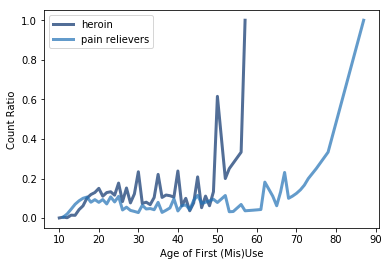

In [39]:
her_age_sf = survival.MakeSurvivalFromCdf(her_age_cdf)
pnr_age_sf = survival.MakeSurvivalFromCdf(pnr_age_cdf)
oxy_age_sf = survival.MakeSurvivalFromCdf(oxy_age_cdf)

her_age_hf = her_age_sf.MakeHazardFunction()
pnr_age_hf = pnr_age_sf.MakeHazardFunction()
oxy_age_hf = oxy_age_sf.MakeHazardFunction()


thinkplot.Plot(her_age_hf, label = 'heroin')
thinkplot.Plot(pnr_age_hf, label = 'pain relievers')
# thinkplot.Plot(oxy_age_hf)
thinkplot.Config(xlabel='Age of First (Mis)Use', ylabel='Count Ratio')

### Modeling the Distribution of Heroin Age of First Use

This graphical comparison of ages got me curious about modeling these distributions. I thought that heroin first use age looked like a normal distribution, so I first tried plot that against a normal model, but found that there were some definite differences between those two. I then tried ploting the distribution against that a lognormal model. I found this plot to be much closer to the experimental distribution. It is interesting that this plot is so similar to a calculated model given that it is such a complex issue in the US today. Lognormal means that there are a number of independent and identically distributed factors causing the distribution, which is certainly true, but given that it follows so closely to this model makes me feel like intervention should be perhaps easier than a random model.

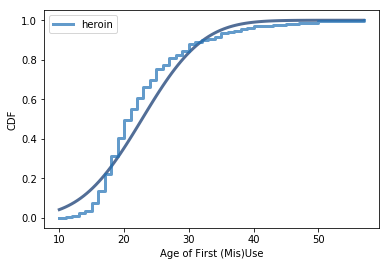

In [10]:
her_mu = nsduh['herage'].mean()
her_sigma = nsduh['herage'].std()
her_min = nsduh['herage'].min()
her_max = nsduh['herage'].max()

xs,ps = RenderNormalCdf(mu=her_mu, sigma=her_sigma,
                                   low = her_min, high = her_max)


thinkplot.Plot(xs, ps)
thinkplot.Cdf(her_age_cdf)
thinkplot.Config(xlabel='Age of First (Mis)Use', ylabel='CDF')

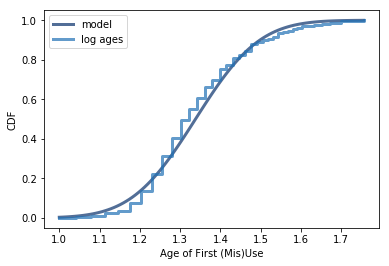

In [11]:
log_her_ages = np.log10(nsduh['herage'])
log_her_ages_cdf = Cdf(log_her_ages, label='log ages')

her_mu = log_her_ages.mean()
her_sigma = log_her_ages.std()
her_min = log_her_ages.min()
her_max = log_her_ages.max()

xs,ps = RenderNormalCdf(mu=her_mu, sigma=her_sigma,
                                   low = her_min, high = her_max)

thinkplot.Plot(xs, ps, label = 'model')
thinkplot.Cdf(log_her_ages_cdf)
thinkplot.Config(xlabel='Age of First (Mis)Use', ylabel='CDF')

## Educational Survival

I was also curious about the effect that education level and opioid abuse have on each other. If there is any effect, I think that it can go in both directions - that people with a lower education level are at a higher risk of abusing opioid and that those who do abuse opioids probably leave school at an earlier age. As a reminder of what the education numbers mean, I have included a label of what each level means.

| Number | Education Level |
| --- | --- |
| College graduate or higher | 15 |
| Associates degree | 14 |
| Some college credit, but no degree | 13 |
| High school diploma/GED | 12 |
| Eleventh or Twelfth grade completed no diploma | 11 |
| Tenth grade completed | 10 |
| Ninth grade completed | 9 |
| Eighth grade completed | 8 |
| Seventh grade completed | 7 |
| Sixth grade completed | 6 |
| Fifth grade or less grade completed | 5 |

In [12]:
her_users = nsduh[nsduh['herflag'] == 1]
pain_users = nsduh[nsduh['pnrnmflag'] == 1]
non_users = nsduh[(nsduh['herflag'] == 0) & (nsduh['pnrnmflag'] == 0)]

In [13]:
her_users['IREDUHIGHST2'].describe()

count    1029.000000
mean       12.267250
std         1.587741
min         5.000000
25%        12.000000
50%        12.000000
75%        13.000000
max        15.000000
Name: IREDUHIGHST2, dtype: float64

In [14]:
pain_users['IREDUHIGHST2'].describe()

count    5930.000000
mean       12.556661
std         2.073594
min         5.000000
25%        12.000000
50%        13.000000
75%        14.000000
max        15.000000
Name: IREDUHIGHST2, dtype: float64

In [15]:
non_users['IREDUHIGHST2'].describe()

count    50003.000000
mean        11.719537
std          2.753651
min          5.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         15.000000
Name: IREDUHIGHST2, dtype: float64

Interestingly, the mean of opioid users tips past earning a GED or high school diploma while non-users do not. To investigate this, I plotted a CDF and survival curve looking at the education level of heroin users, pain reliever users, and non-users. The non-users tend to drop-out more slowly than heroin or pain reliever users, which I would imagine is due to the size of the population of non-users. There are so many more non-users, that the curve is much more evenly distributed. There is a sharper drop off for all curves at the point of high school, which makes sense given that is a fairly large point of change. After that turning point, the rate at which non-users are likely to drop out slows down and whereas the rate for heroin drops fairly sharply. I hypothesize that this is due to the "danger zone" of from the survival curve of heroin use - that a large portion of heroin users first use in their late teens and early twenties. 

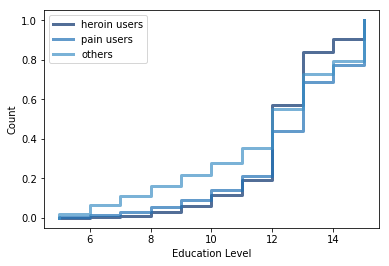

In [16]:
her_user_cdf = Cdf(her_users['IREDUHIGHST2'], label='heroin users')
pain_users_cdf = Cdf(pain_users['IREDUHIGHST2'], label='pain users')
non_users_cdf = Cdf(non_users['IREDUHIGHST2'], label='others')

thinkplot.Cdf(her_user_cdf)
thinkplot.Cdf(pain_users_cdf)
thinkplot.Cdf(non_users_cdf)
thinkplot.Config(xlabel='Education Level', ylabel='Count')

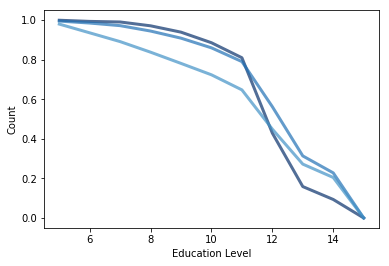

In [17]:
her_user_sf = survival.MakeSurvivalFromCdf(her_user_cdf)
pain_users_sf = survival.MakeSurvivalFromCdf(pain_users_cdf)
non_users_sf = survival.MakeSurvivalFromCdf(non_users_cdf)
thinkplot.Plot(her_user_sf)
thinkplot.Plot(pain_users_sf)
thinkplot.Plot(non_users_sf)
thinkplot.Config(xlabel='Education Level', ylabel='Count')

To get a better understanding of the effect size between opioid users and non-users, I checked the mean differences and Cohen Effect Size for both heroin and pain relievers. There is a larger difference between pain reliever users compared to heroin users. Which might be due to how heroin users typically use for the first time later in life that those abusing pain relievers, which likely would effect if they are able to complete school or not. Neither of these indicators are particularly strong demonstrators between the effect sizes of the two groups, but it's a good exercise to do.

In [18]:
her_users['IREDUHIGHST2'].mean()-non_users['IREDUHIGHST2'].mean()

0.5477129292553435

In [19]:
CohenEffectSize(her_users['IREDUHIGHST2'], 
                non_users['IREDUHIGHST2'])

0.2002565895448763

In [20]:
pain_users['IREDUHIGHST2'].mean()-non_users['IREDUHIGHST2'].mean()

0.8371242177408647

In [21]:
CohenEffectSize(pain_users['IREDUHIGHST2'], 
                non_users['IREDUHIGHST2'])

0.31123191250392895

## Education and Age Relationship

I was also curious about to look at the effect between age of first use and education level. I initially did a scatter plot of age of first use against education level for both heroin users and pain reliever misusers. Heroin user's education level is not particularly affected by how old they are when they use for the first time, which makes sense given that most heroin users use for the first time during their twenties when the general population is no longer in school. The plot of pain reliever users seems to have a very strong relationship between early childhood use and education level. I am very unsure of why this might be and hope to investigate further.

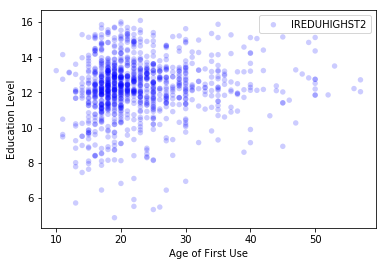

In [28]:
her_ages = her_users['herage']
her_educ = Jitter(her_users['IREDUHIGHST2'], 0.5)

thinkplot.Scatter(her_ages, her_educ)
thinkplot.Config(xlabel='Age of First Use', ylabel='Education Level')

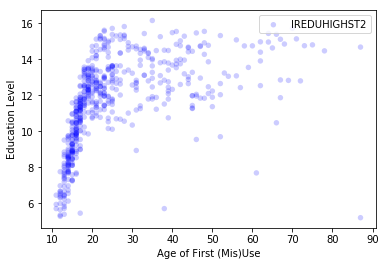

In [29]:
pain_ages = pain_users['irpnrnmage']
pain_educ = Jitter(pain_users['IREDUHIGHST2'], 0.5)

thinkplot.Scatter(pain_ages, pain_educ)
thinkplot.Config(xlabel='Age of First (Mis)Use', ylabel='Education Level')

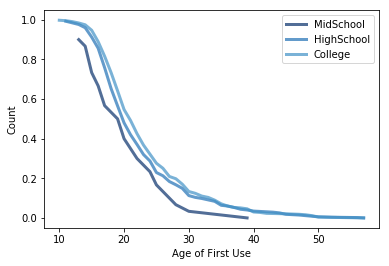

In [40]:
her_ms = her_users[her_users['IREDUHIGHST2'] <= 8.0]
her_hs = her_users[(her_users['IREDUHIGHST2'] <= 12.0) & (her_users['IREDUHIGHST2'] > 8.0)]
her_coll = her_users[(her_users['IREDUHIGHST2'] <= 15.0) & (her_users['IREDUHIGHST2'] > 12.0)]

her_ms_cdf = Cdf(her_ms['herage'])
her_hs_cdf = Cdf(her_hs['herage'])
her_coll_cdf = Cdf(her_coll['herage'])

her_ms_sf = survival.MakeSurvivalFromCdf(her_ms_cdf)
her_hs_sf = survival.MakeSurvivalFromCdf(her_hs_cdf)
her_coll_sf = survival.MakeSurvivalFromCdf(her_coll_cdf)
thinkplot.Plot(her_ms_sf, label='MidSchool')
thinkplot.Plot(her_hs_sf, label='HighSchool')
thinkplot.Plot(her_coll_sf, label='College')

thinkplot.Config(xlabel='Age of First Use', ylabel='Count')

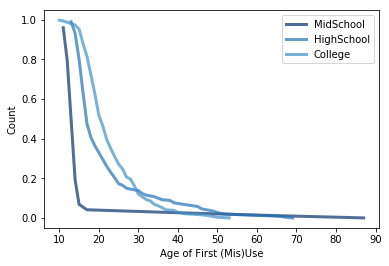

In [41]:
pnr_ms = pain_users[pain_users['IREDUHIGHST2'] <= 8.0]
pnr_hs = pain_users[(pain_users['IREDUHIGHST2'] <= 12.0) & (pain_users['IREDUHIGHST2'] > 8.0)]
pnr_coll = pain_users[(pain_users['IREDUHIGHST2'] <= 15.0) & (pain_users['IREDUHIGHST2'] > 12.0)]

pain_ms_cdf = Cdf(pnr_ms['irpnrnmage'])
pain_hs_cdf = Cdf(pnr_hs['irpnrnmage'])
pain_coll_cdf = Cdf(pnr_coll['herage'])

pain_ms_sf = survival.MakeSurvivalFromCdf(pain_ms_cdf)
pain_hs_sf = survival.MakeSurvivalFromCdf(pain_hs_cdf)
pain_coll_sf = survival.MakeSurvivalFromCdf(pain_coll_cdf)
thinkplot.Plot(pain_ms_sf, label='MidSchool')
thinkplot.Plot(pain_hs_sf, label='HighSchool')
thinkplot.Plot(pain_coll_sf, label='College')

thinkplot.Config(xlabel='Age of First (Mis)Use', ylabel='Count')